In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics
from scipy.stats import norm 
from tabulate import tabulate

from iexfinance.stocks import get_historical_data
from iexfinance.stocks import Stock
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
stock_prices = pd.read_csv('Market+Risk+Dataset.csv')

#Glimpse of Data
stock_prices.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [3]:
stock_prices.tail()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
309,02-03-2020,729,120,469,658,33,23110,401,146,3,22
310,09-03-2020,634,114,427,569,30,21308,384,121,6,18
311,16-03-2020,577,90,321,428,27,18904,365,105,3,16
312,23-03-2020,644,75,293,360,21,17666,338,89,3,14
313,30-03-2020,633,75,284,379,23,17546,352,82,3,14


In [4]:
stock_prices.columns = stock_prices.columns.str.replace(' ', '_').str.replace('&', 'and')

In [5]:
stock_prices.columns

Index(['Date', 'Infosys', 'Indian_Hotel', 'Mahindra_and_Mahindra', 'Axis_Bank',
       'SAIL', 'Shree_Cement', 'Sun_Pharma', 'Jindal_Steel', 'Idea_Vodafone',
       'Jet_Airways'],
      dtype='object')

In [6]:
stock_prices.shape

(314, 11)

In [7]:
stock_prices['Date'] = [pd.to_datetime(d) for d in stock_prices['Date']]

Text(0.5, 1.0, 'Infosys Stock Price 31-03-2014 - 30-03-2020')

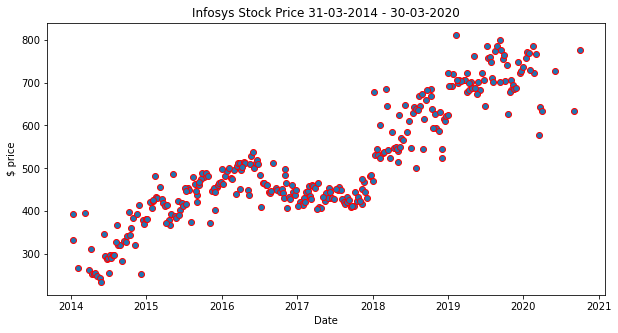

In [8]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['Infosys'], edgecolors='r')
#plt.plot(stock_prices.index, stock_prices['Adj_Close'])
plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("Infosys Stock Price 31-03-2014 - 30-03-2020")

Text(0.5, 1.0, 'Indian_Hotel Stock Price 31-03-2014 - 30-03-2020')

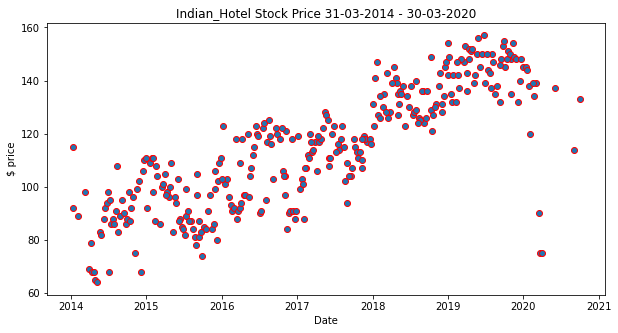

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['Indian_Hotel'], edgecolors='r')

plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("Indian_Hotel Stock Price 31-03-2014 - 30-03-2020")

Text(0.5, 1.0, 'Mahindra_and_Mahindra Stock Price 31-03-2014 - 30-03-2020')

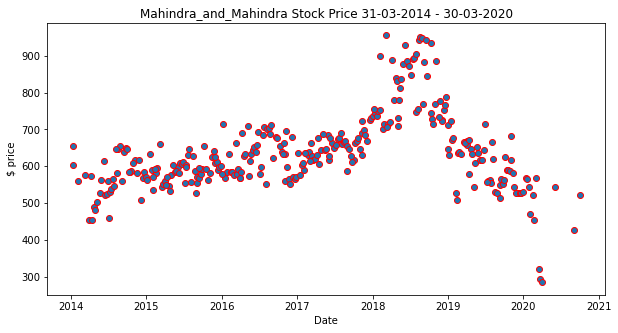

In [10]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['Mahindra_and_Mahindra'], edgecolors='r')

plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("Mahindra_and_Mahindra Stock Price 31-03-2014 - 30-03-2020")

Text(0.5, 1.0, 'Axis_Bank Stock Price 31-03-2014 - 30-03-2020')

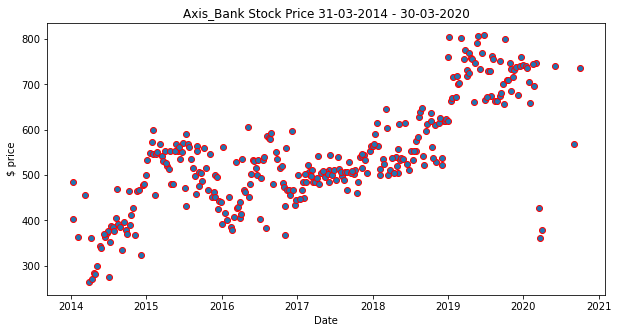

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['Axis_Bank'], edgecolors='r')

plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("Axis_Bank Stock Price 31-03-2014 - 30-03-2020")

Text(0.5, 1.0, 'SAIL Stock Price 31-03-2014 - 30-03-2020')

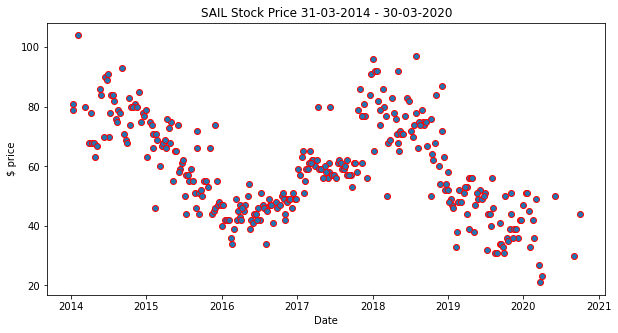

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['SAIL'], edgecolors='r')

plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("SAIL Stock Price 31-03-2014 - 30-03-2020")

Text(0.5, 1.0, 'Shree_Cement Stock Price 31-03-2014 - 30-03-2020')

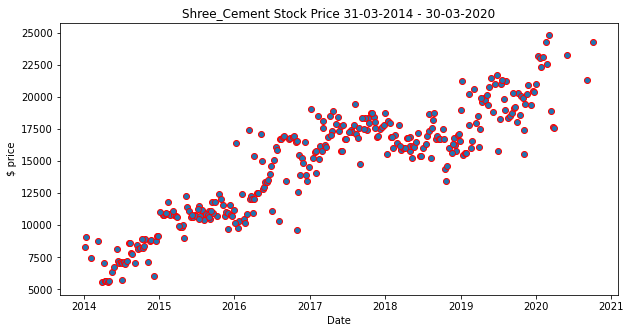

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['Shree_Cement'], edgecolors='r')

plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("Shree_Cement Stock Price 31-03-2014 - 30-03-2020")

Text(0.5, 1.0, 'Sun_Pharma Stock Price 31-03-2014 - 30-03-2020')

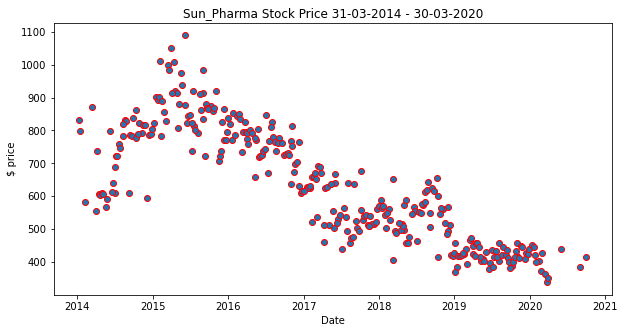

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['Sun_Pharma'], edgecolors='r')

plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("Sun_Pharma Stock Price 31-03-2014 - 30-03-2020")

Text(0.5, 1.0, 'Jindal_Steel Stock Price 31-03-2014 - 30-03-2020')

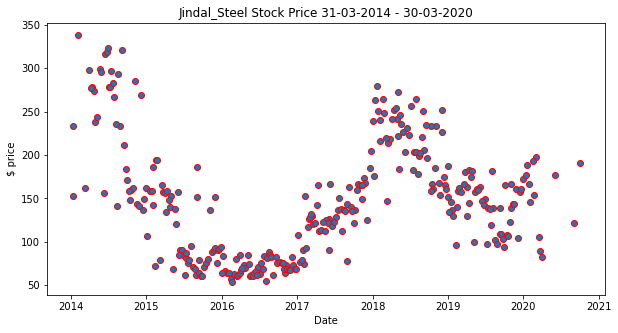

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['Jindal_Steel'], edgecolors='r')

plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("Jindal_Steel Stock Price 31-03-2014 - 30-03-2020")

Text(0.5, 1.0, 'Idea_Vodafone Stock Price 31-03-2014 - 30-03-2020')

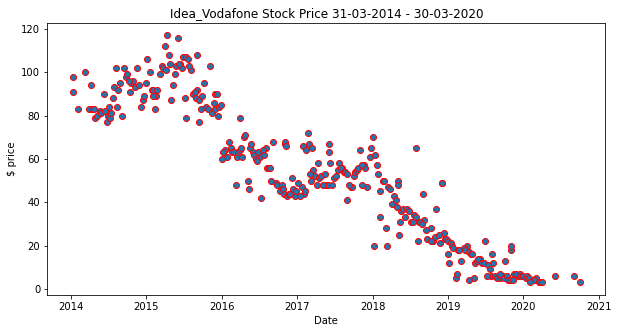

In [16]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['Idea_Vodafone'], edgecolors='r')

plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("Idea_Vodafone Stock Price 31-03-2014 - 30-03-2020")

Text(0.5, 1.0, 'Jet_Airways Stock Price 31-03-2014 - 30-03-2020')

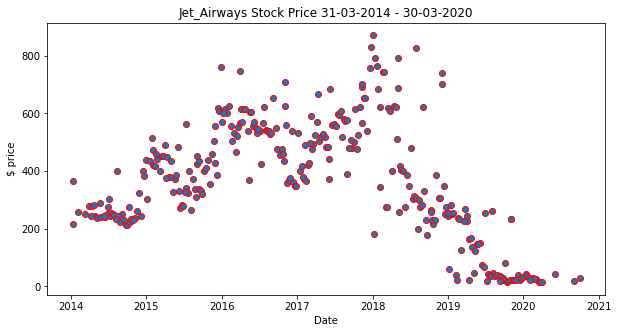

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['Jet_Airways'], edgecolors='r')

plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("Jet_Airways Stock Price 31-03-2014 - 30-03-2020")

In [19]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   314 non-null    datetime64[ns]
 1   Infosys                314 non-null    int64         
 2   Indian_Hotel           314 non-null    int64         
 3   Mahindra_and_Mahindra  314 non-null    int64         
 4   Axis_Bank              314 non-null    int64         
 5   SAIL                   314 non-null    int64         
 6   Shree_Cement           314 non-null    int64         
 7   Sun_Pharma             314 non-null    int64         
 8   Jindal_Steel           314 non-null    int64         
 9   Idea_Vodafone          314 non-null    int64         
 10  Jet_Airways            314 non-null    int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 27.1 KB


In [21]:
stock_prices.describe(include="all").T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Date,314,314,2016-08-08,1,2014-01-09,2020-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Infosys,314.0,NaN,NaT,NaN,NaT,NaT,511.340764,135.952051,234.0,424.0,466.5,630.75,810.0
Indian_Hotel,314.0,NaN,NaT,NaN,NaT,NaT,114.56051,22.509732,64.0,96.0,115.0,134.0,157.0
Mahindra_and_Mahindra,314.0,NaN,NaT,NaN,NaT,NaT,636.678344,102.879975,284.0,572.0,625.0,678.0,956.0
Axis_Bank,314.0,NaN,NaT,NaN,NaT,NaT,540.742038,115.835569,263.0,470.5,528.0,605.25,808.0
SAIL,314.0,NaN,NaT,NaN,NaT,NaT,59.095541,15.810493,21.0,47.0,57.0,71.75,104.0
Shree_Cement,314.0,NaN,NaT,NaN,NaT,NaT,14806.410828,4288.275085,5543.0,10952.25,16018.5,17773.25,24806.0
Sun_Pharma,314.0,NaN,NaT,NaN,NaT,NaT,633.468153,171.855893,338.0,478.5,614.0,785.0,1089.0
Jindal_Steel,314.0,NaN,NaT,NaN,NaT,NaT,147.627389,65.879195,53.0,88.25,142.5,182.75,338.0
Idea_Vodafone,314.0,NaN,NaT,NaN,NaT,NaT,53.713376,31.248985,3.0,25.25,53.0,82.0,117.0


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web

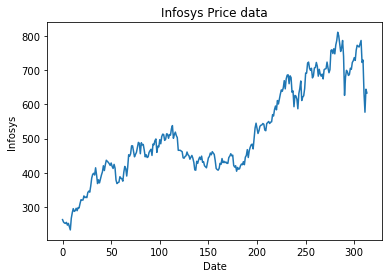

In [25]:
stock_prices['Infosys'].plot()
plt.xlabel("Date")
plt.ylabel("Infosys")
plt.title("Infosys Price data")
plt.show()

In [29]:
Infosys_daily_returns = stock_prices['Infosys'].pct_change()
Infosys_monthly_returns = stock_prices['Date'].resample('M').ffill().pct_change()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'